

# Simple Linear Regression Using Scikit-learn


## Introduction

In this project, we study a simple linear regression using the machine learning library, scikit-learn. Our analysis uses the [dataset](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64) about model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. 

This project is divided in the following way:

1. Load and Wrangling Data
2. Linear Regression
3. Conclusions

In [1]:
# Imported some important libraries.
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline

## Load and Wrangling Data

After import libraries to analyse data, we load the first five rows of our dataset.

In [2]:
# Load csv file.
data = pd.read_csv("../data/raw/MY2023_Fuel_Consumption_Ratings.csv", skiprows=0)
data.head(5)

,Model Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2023,Acura,Integra,Full-size,1.5,4,AV7,Z,7.9,6.3,7.2,39,167,6,7
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5


In [3]:
# information about a data including the index dtype and columns, non-null values and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Model Year                        821 non-null    int64  
 1   Make                              821 non-null    object 
 2   Model                             821 non-null    object 
 3   Vehicle Class                     821 non-null    object 
 4   Engine Size (L)                   821 non-null    float64
 5   Cylinders                         821 non-null    int64  
 6   Transmission                      821 non-null    object 
 7   Fuel Type                         821 non-null    object 
 8   Fuel Consumption City (L/100 km)  821 non-null    float64
 9   Hwy (L/100 km)                    821 non-null    float64
 10  Comb (L/100 km)                   821 non-null    float64
 11  Comb (mpg)                        821 non-null    int64  
 12  CO2 Emis

In [4]:
data.shape

(821, 15)

In [5]:
# Rename columns.
new_cols = {'Model Year': 'model_year', 'Make': 'make', 'Model': 'models', 'Vehicle Class': 'vehicle_class', 'Engine Size (L)':'engine_size',
            'Cylinders': 'cylinders', 'Transmission': 'trasmission', 'Fuel Type': 'fuel_type', 'Fuel Consumption City (L/100 km)':'fuel_consumption_city', 
            'Hwy (L/100 km)': 'fuel_consumption_hwy', 'Comb (L/100 km)': 'fuel_consumption_comb', 'Comb (mpg)': 'fuel_consumption_comb_mpg',
            'CO2 Emissions (g/km)': 'fuel_consumption_comb_mpg', 'CO2 Emissions (g/km)': 'co2_emissions', 
            'CO2 Rating': 'co2_rating', 'Smog Rating': 'smog_rating'}

data.rename(columns=new_cols, inplace=True)
data.head()

,model_year,make,models,vehicle_class,engine_size,cylinders,trasmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions,co2_rating,smog_rating
0,2023,Acura,Integra,Full-size,1.5,4,AV7,Z,7.9,6.3,7.2,39,167,6,7
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5


In [6]:
# Check for duplicates.
data.duplicated().sum()

0

In [7]:
# Check null values.
data.isnull().sum()

model_year                   0
make                         0
models                       0
vehicle_class                0
engine_size                  0
cylinders                    0
trasmission                  0
fuel_type                    0
fuel_consumption_city        0
fuel_consumption_hwy         0
fuel_consumption_comb        0
fuel_consumption_comb_mpg    0
co2_emissions                0
co2_rating                   0
smog_rating                  0
dtype: int64

What are the **features**?

- engine_size (L): Engine size is the volume of fuel and air that can be pushed through a car’s cylinders.
- cylinders: A cylinder is a crucial part of the engine where fuel is combusted and power is generated. It consists of a piston, an inlet, and exhaust valves at the top.
- fuel_consumption_city (L/100 km): City fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) .
- fuel_consumption_hwy (L/100 km): Highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km).
- fuel_consumption_comb (L/100 km): The combined rating (55% city, 45% hwy) is shown in L/100 km.

What is the **response**?

- co2_emissions (g/km): the tailpipe emissions of carbon dioxide (in grams per kilometer) for combined city and highway driving


In [8]:
# The features with correlation coefficient.
data = data[['engine_size', 'cylinders', 'fuel_consumption_city', 
             'fuel_consumption_hwy', 'fuel_consumption_comb', 'co2_emissions']]
data.corr()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,co2_emissions
engine_size,1.000000,0.917732,0.829180,0.726221,0.808091,0.805142
cylinders,0.917732,1.000000,0.839277,0.722847,0.813473,0.820007
fuel_consumption_city,0.829180,0.839277,1.000000,0.916695,0.989545,0.957900
fuel_consumption_hwy,0.726221,0.722847,0.916695,1.000000,0.964510,0.926076
fuel_consumption_comb,0.808091,0.813473,0.989545,0.964510,1.000000,0.965122
co2_emissions,0.805142,0.820007,0.957900,0.926076,0.965122,1.000000


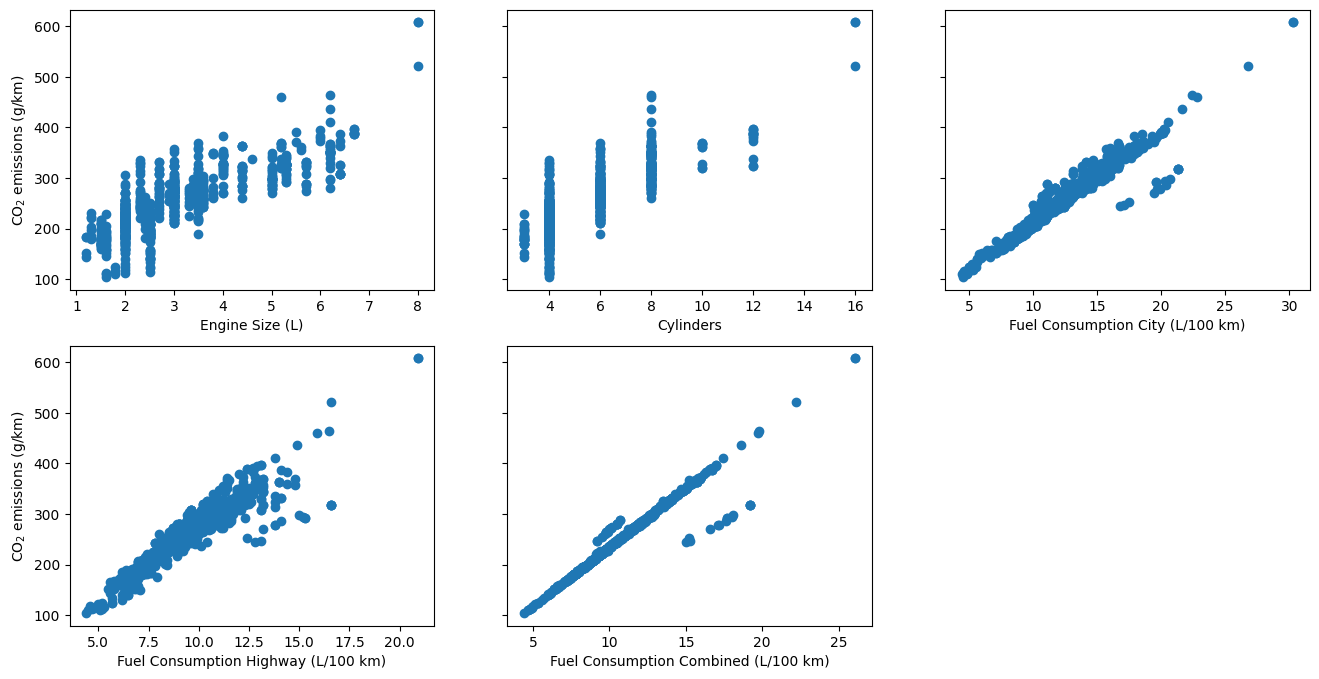

In [9]:
fig, axs = plt.subplots(2, 3, sharey=True, figsize=(16, 8))
axs[0][0].scatter(data['engine_size'], y=data['co2_emissions'])
axs[0][1].scatter(data['cylinders'], y=data['co2_emissions'])
axs[0][2].scatter(data['fuel_consumption_city'], y=data['co2_emissions'])
axs[1][0].scatter(data['fuel_consumption_hwy'], y=data['co2_emissions'])
axs[1][1].scatter(data['fuel_consumption_comb'], y=data['co2_emissions'])
axs[1,2].set_axis_off()

axs[0][0].set_ylabel(r'CO$_2$ emissions (g/km)')
axs[1][0].set_ylabel(r'CO$_2$ emissions (g/km)')

axs[0][0].set_xlabel('Engine Size (L)')
axs[0][1].set_xlabel('Cylinders')
axs[0][2].set_xlabel('Fuel Consumption City (L/100 km)')
axs[1][0].set_xlabel('Fuel Consumption Highway (L/100 km)')
axs[1][1].set_xlabel('Fuel Consumption Combined (L/100 km)')
plt.show()

In this code we are interested in using only one feature in the linear regression analysis. In the next project, a multiple linear regression will be implemented.

In [10]:
# Splitting X and y into training and testing sets
feature_cols = ['engine_size', 'cylinders', 'fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb']
X = data[feature_cols]
y = data.co2_emissions

X_train, X_test, y_train, y_test = train_test_split(X[['fuel_consumption_comb']], y, test_size = 0.3, random_state = 42)

In [11]:
# Linear regression in scikit-learn
lin_reg = LinearRegression()

# Fit the model to the training data 
lin_reg.fit(X_train, y_train)

LinearRegression()

In [12]:
# print the intercept and coefficient
alpha = lin_reg.intercept_
beta = lin_reg.coef_
print('Intercept: {:.3f}'.format(alpha))
print('Slope: {:.3f}'.format(beta[0]))

Intercept: 18.576
Slope: 21.587


The intepretation of intercept and coefficient is as follows:

- The intercept value means the CO$_2$ emissions is equal to $18.576$ g/km when Fuel consumption is zero.
- A unit of Fuel consumption is associated with a $21.587$ unit increase CO$_2$ emissions.

The linear regression equation for train data is

\begin{equation*}
\hat{y} = 18.576 + 21.587 x,
\end{equation*}

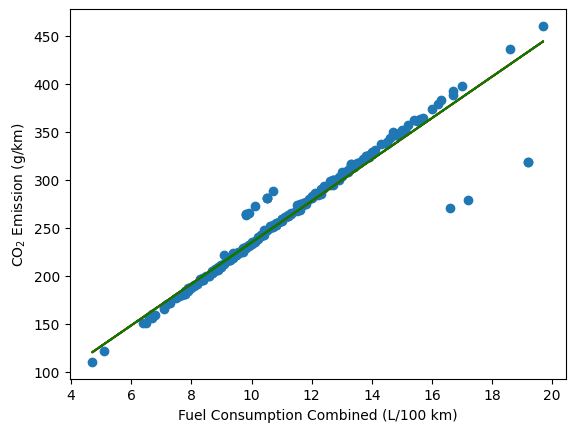

In [13]:
# Plot linear regression line on test dataset
plt.scatter(X_test, y_test)
plt.plot(X_test, lin_reg.predict(X_test), 'r')
plt.plot(X_test, 18.576 + 21.587*X_test, '--g')
plt.xlabel('Fuel Consumption Combined (L/100 km)')
plt.ylabel(r'CO$_2$ Emission (g/km)')
plt.show()

In [14]:
# Dataframe with actual value and predicted value.
pd.DataFrame({'Actual value': y_test, 'Predicted value': lin_reg.predict(X_test)})

,Actual value,Predicted value
609,256,253.872751
174,252,249.555377
67,209,212.857700
168,253,249.555377
275,241,240.920629
...,...,...
572,349,342.378913
800,159,165.366589
625,225,225.809821
145,207,208.540326


In [15]:
#Model Evaluation

R2 = lin_reg.score(X[['fuel_consumption_comb']],y)*100

print('R²:', round(R2, 2))

R²: 93.14


The value of $R^2 = 93.14$, which indicates that $93.14 \%$ of the data fit the regression model.

In [16]:
# Calcule of residuals and standard residuals

prediction = lin_reg.predict(X_test)
residual = (y_test - prediction)

mean = residual.mean()
std = residual.std()

StdResidual = (residual - mean)/std

# Save X_test, residuals and standard residuals.
np.savetxt('../data/processed/residuals_model_2.txt', np.column_stack([X_test, residual, StdResidual]), fmt='%6.5f')

In [17]:
# Create a list of feature names.
feature_cols = ['engine_size', 'cylinders', 'fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb']

# Use the list to select a subset.
X = data[feature_cols]

# Welect a Series from the DataFrame.
y = data.co2_emissions

# Split into training and testing setsl.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

# Fit the model to the training data.
lin_reg.fit(X_train, y_train)

# Make predictions on the testing set.
y_pred = lin_reg.predict(X_test)

# Mean Absolute Error (MAE) is the mean of the absolute value of the errors.
MAE = metrics.mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE) is the mean of the squared errors.
MSE = metrics.mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# Coefficient of determination.
R2 = lin_reg.score(X,y)*100


print('R squared:', round(R2, 2))

R squared: 93.51
